In [1]:
import altair as alt
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

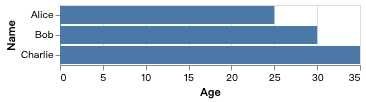

In [2]:
# Create data for the DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 35],
        'City': ['New York', 'Paris', 'London']
}
 
 
# Create the DataFrame from the data
df = pd.DataFrame(data)
 
# Create the chart
bar_chart = alt.Chart(df).mark_bar(
).encode(
    x = 'Age:Q',     
    y = 'Name:N' 
)
 
bar_chart

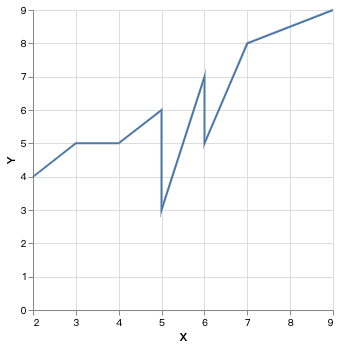

In [3]:
data = {
   'X' : [2,3,5,6,7,9,4,5,5,6],
   'Y' : [4,5,6,7,8,9,5,6,3,5]
}

df = pd.DataFrame(data)

line_chart = alt.Chart(df).mark_line().encode(
    x = 'X',     
    y = 'Y' 
)

line_chart

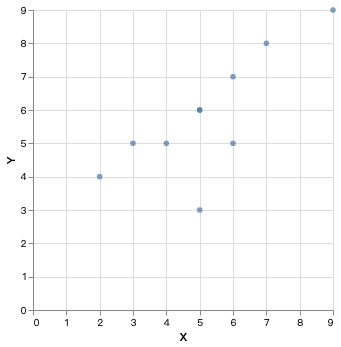

In [4]:
data = {
   'X' : [2,3,5,6,7,9,4,5,5,6],
   'Y' : [4,5,6,7,8,9,5,6,3,5]
}

df = pd.DataFrame(data)


scatter_chart = alt.Chart(df).mark_circle().encode(
    x = 'X',     
    y = 'Y' 
)

scatter_chart

In [5]:
df = pd.read_csv('dataset/tourist_arrivals_countries.csv', parse_dates=['Date'])
df.head()

,Date,IT,FR,DE,PT,ES,UK
0,1990-01-01,2543920.0,NaN,3185877.0,325138.0,1723786.0,1776000.0
1,1990-02-01,2871632.0,NaN,3588879.0,381539.0,1885718.0,2250000.0
2,1990-03-01,3774702.0,NaN,4272437.0,493957.0,2337847.0,2662000.0
3,1990-04-01,5107712.0,NaN,4689424.0,635822.0,3172302.0,2645000.0
4,1990-05-01,4738376.0,NaN,6045278.0,609952.0,3072480.0,3096000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    358 non-null    datetime64[ns]
 1   IT      358 non-null    float64       
 2   FR      322 non-null    float64       
 3   DE      358 non-null    float64       
 4   PT      358 non-null    float64       
 5   ES      356 non-null    float64       
 6   UK      346 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 19.7 KB


In [7]:
# raw chart
df1 = pd.melt(df, id_vars='Date', value_name='Tourist Arrivals', var_name='Country')
df1.head()

,Date,Country,Tourist Arrivals
0,1990-01-01,IT,2543920.0
1,1990-02-01,IT,2871632.0
2,1990-03-01,IT,3774702.0
3,1990-04-01,IT,5107712.0
4,1990-05-01,IT,4738376.0


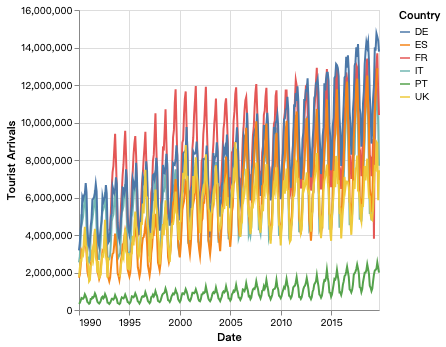

In [8]:
chart = alt.Chart(df1).mark_line().encode(
    x = 'Date:T',
    y = 'Tourist Arrivals:Q',
    color=alt.Color('Country:N')
)

chart

In [9]:
df1.loc[:, 'Year'] = df1['Date'].dt.year
# filter out years before 1994 and after 2018
df1 = df1[(df1['Year'] >= 1994) & (df1['Year'] <= 2018)]